<a href="https://colab.research.google.com/github/Midyafn/DS_challenge/blob/main/DS_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




```
By: Ni Luh Gede Midya Frangginie

For Dibimbing Data Science Challenge

```



## Data Wrangling

> importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/My Drive/python/dibimbing/train.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,...,314.0,NaN,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,...,1.0,NaN,0,Transient,62.80,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,...,12.0,NaN,0,Transient,110.00,0,0,Canceled,2018-11-25,3
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,...,NaN,200.0,0,Transient,45.00,0,0,Check-Out,2018-10-18,4
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,...,16.0,NaN,0,Transient,57.92,0,1,Canceled,2017-08-24,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83290 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

terdapat total 33 kolom

# Exploring and Cleaning Data

In [ ]:
#company and agent has many NaN values so it can be dropped
print(df.isnull().sum().sort_values(ascending=False))

company                           78559
agent                             11404
country                             346
children                              3
hotel                                 0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
days_in_waiting_list                  0
previous_bookings_not_canceled        0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
reservation_status_date               0
reserved_room_type                    0
is_repeated_guest                     0
previous_cancellations                0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0


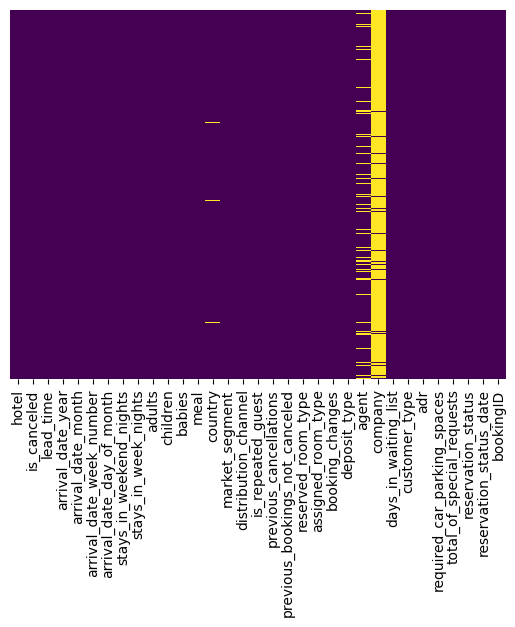

In [ ]:
# Detect Null Values menggunakan heatmap
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

## Exploring and Cleaning

**menghapus kolom apabila terdapat banyak NAN values**

> Company

In [ ]:
#company has many NAN values so it can be dropped
df = df.drop('company', axis=1)
print(df.isnull().sum().sort_values(ascending=False))

agent                             11404
country                             346
children                              3
hotel                                 0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
days_in_waiting_list                  0
previous_cancellations                0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
reservation_status_date               0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


> Agent

In [ ]:
print('Jumlah Unique Items pada Agent =',df['agent'].nunique())
df['agent'].value_counts()

Jumlah Unique Items pada Agent = 320


9.0      22305
240.0     9667
1.0       4943
14.0      2529
7.0       2511
         ...  
337.0        1
352.0        1
299.0        1
446.0        1
144.0        1
Name: agent, Length: 320, dtype: int64

In [ ]:
#agent has many NAN values and cannot be used to it can be dropped
df = df.drop('agent', axis=1)
print(df.isnull().sum().sort_values(ascending=False))

country                           346
children                            3
hotel                               0
previous_cancellations              0
reservation_status_date             0
reservation_status                  0
total_of_special_requests           0
required_car_parking_spaces         0
adr                                 0
customer_type                       0
days_in_waiting_list                0
deposit_type                        0
booking_changes                     0
assigned_room_type                  0
reserved_room_type                  0
previous_bookings_not_canceled      0
distribution_channel                0
is_repeated_guest                   0
is_canceled                         0
market_segment                      0
meal                                0
babies                              0
adults                              0
stays_in_week_nights                0
stays_in_weekend_nights             0
arrival_date_day_of_month           0
arrival_date

> Mengisi data Country

In [ ]:
print('Jumlah Unique Items pada Country =',df['country'].nunique())
df['country'].value_counts()

Jumlah Unique Items pada Country = 165


PRT    33952
GBR     8381
FRA     7243
ESP     5897
DEU     5107
       ...  
MRT        1
BRB        1
NPL        1
DJI        1
NAM        1
Name: country, Length: 165, dtype: int64

In [ ]:
#see other data where country is NAN
nan_country_rows = df[df['country'].isna()]
nan_country_rows.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
82803,Cape Town Marriott Hotel Crystal Towers Cape T...,0,4,2018,January,5,26,0,1,1,...,0,No Deposit,0,Transient,49.00,0,0,Check-Out,2018-01-27,82804
82999,"Las Vegas Marriott Las Vegas, NV",0,18,2018,March,13,22,0,1,1,...,0,No Deposit,0,Transient,30.00,0,0,Check-Out,2018-03-23,83000
83028,"Crystal Cove, Barbados Barbados",0,2,2018,December,51,15,0,1,1,...,0,No Deposit,0,Transient,36.00,1,0,Check-Out,2018-12-16,83029
83211,"Renaissance Hamburg Hotel Hamburg, Germany",0,87,2019,April,15,13,1,3,2,...,0,No Deposit,0,Transient,145.75,1,2,Check-Out,2019-04-17,83212
83255,"Protea Hotel by Marriott Midrand Midrand, Sout...",0,0,2018,April,18,26,0,2,1,...,0,No Deposit,0,Transient,47.70,0,0,Check-Out,2018-04-28,83256


In [ ]:
#see list of the hotel
print('Jumlah Unique Items pada Hotel =',df['hotel'].nunique())
hotel_name = df['hotel'].value_counts()
hotel_name.head(30)


Jumlah Unique Items pada Hotel = 64


Renaissance New York Times Square Hotel New York, NY                      1373
Sacramento Airport Natomas Courtyard Sacramento, CA                       1372
Las Vegas Marriott Las Vegas, NV                                          1371
Crystal Cove, Barbados Barbados                                           1360
Protea Hotel by Marriott Midrand Midrand, South Africa                    1352
Sheraton Lima Hotel & Convention Center Lima, Peru                        1347
Courtyard by Marriott Paris Gare de Lyon Paris, France                    1347
Orlando International Drive/Convention Center Courtyard Orlando, FL       1340
Heidelberg Marriott Hotel Heidelberg, Germany                             1337
Baton Rouge Acadian Centre/LSU Area Courtyard Baton Rouge, LA             1336
The Ritz-Carlton, Berlin Berlin, Germany                                  1334
W London – Leicester Square London, United Kingdom                        1331
Hotel Alfonso XIII, a Luxury Collection Hotel, Sevil

In [ ]:
hotel_name.tail(35)

Protea Hotel by Marriott Cape Town Sea Point Cape Town, South Africa                         1304
Leipzig Marriott Hotel Leipzig, Germany                                                      1304
The St. Regis Osaka Osaka, Japan                                                             1303
Berlin Marriott Hotel Berlin, Germany                                                        1300
Frankfurt Marriott Hotel Frankfurt, Germany                                                  1296
The Westin Peachtree Plaza, Atlanta Atlanta, GA                                              1296
Irvine John Wayne Airport/Orange County Courtyard Irvine, CA                                 1295
Courtyard Las Vegas Convention Center Las Vegas, NV                                          1294
Turtle Beach, Barbados Barbados                                                              1294
Indianapolis Airport Courtyard Indianapolis, IN                                              1291
Tamarind, Barbados B

> mengambil data hotel dan country

In [ ]:
#see only the hotel and the country
selected_columns = ['hotel', 'country']

# Create a new DataFrame with selected columns
hotel_country = df[selected_columns]

# Group by 'hotel', aggregate with count and the first 'address'
hotel_country_df = df.groupby('hotel')['country'].agg(['count', 'first']).reset_index()

# Rename columns in the new DataFrame
hotel_country_df.columns = ['hotel', 'count', 'country']
hotel_country_df.head()

,hotel,count,country
0,"African Pride Melrose Arch, Autograph Collecti...",1243,FRA
1,"Albuquerque Airport Courtyard Albuquerque, NM",1319,BEL
2,"Anaheim Marriott Anaheim, CA",1299,GBR
3,"Baltimore BWI Airport Courtyard Linthicum, MD",1321,NLD
4,Baton Rouge Acadian Centre/LSU Area Courtyard ...,1336,PRT


In [ ]:
#checking hotel data with country NAN
country_nan = df[df['country'].isna()]

selected_columns = ['hotel', 'country']
country_nan[selected_columns].count()

hotel      346
country      0
dtype: int64

In [ ]:
result_country_df = df['country'].mask(hotel_country_df['country'].isna(), df['country'])
result_country_df.head()

0    ITA
1    PRT
2    PRT
3    NaN
4    PRT
Name: country, dtype: object

mengisi country yang kosong dengan menyesuaikan dengan nama hotel

In [ ]:

result_country_df = df['country'].combine_first(df['hotel'].map(hotel_country_df.set_index('hotel')['country']))
result_country_df

0        ITA
1        PRT
2        PRT
3        PRT
4        PRT
        ... 
83288    FRA
83289    CHE
83290    IRL
83291    DEU
83292    CHE
Name: country, Length: 83293, dtype: object

In [ ]:
result_country_df.info()

<class 'pandas.core.series.Series'>
RangeIndex: 83293 entries, 0 to 83292
Series name: country
Non-Null Count  Dtype 
--------------  ----- 
83293 non-null  object
dtypes: object(1)
memory usage: 650.9+ KB


In [ ]:
result_country_df.head()

0    ITA
1    PRT
2    PRT
3    PRT
4    PRT
Name: country, dtype: object

memasukkan data country yang sudah berisi data baru ke dalam dataframe

In [ ]:
result_df=df.drop('country', axis=1)
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83290 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

In [ ]:
result_df['country'] = result_country_df
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83290 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

> mengecek kembali data yang kosong

In [ ]:
print(result_df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          3
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

> country data sudah ditambahkan, tersisa data children yang kosong

In [ ]:
#checking unique values from children
result_df.children.value_counts()

0.0     77332
1.0      3351
2.0      2558
3.0        51
10.0        1
Name: children, dtype: int64

In [ ]:
#NaN value from children changed into 0
result_df.fillna(value=0.0, inplace=True)

> mengecek kembali data kosong

In [ ]:
print(result_df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

> menyimpan data yang sudah dibersihkan

In [ ]:
result_df.to_csv('clean_data.csv', index = False)

## Target Distribution

In [ ]:
data = pd.read_csv('/content/drive/My Drive/python/dibimbing/clean_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83293 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

In [ ]:
data.duplicated().sum()

0

mengecek unique values dari data target, yaitu is_canceled

In [ ]:
data['is_canceled'].value_counts()

0    52516
1    30777
Name: is_canceled, dtype: int64

`0 means not canceled and 1 means canceled`

<Axes: title={'center': 'Target Distribution'}>

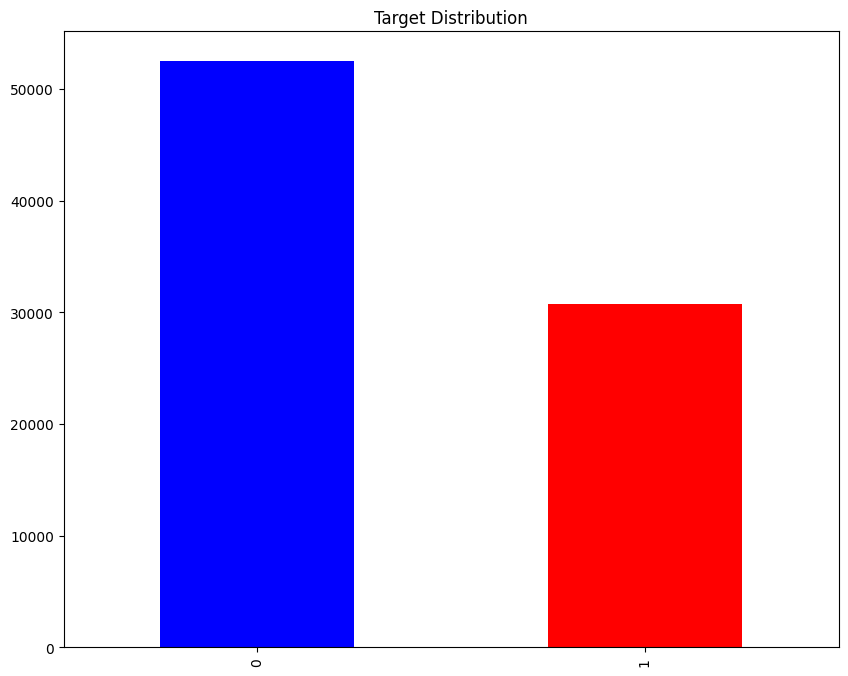

In [ ]:
#visualitation for the target distribution
data['is_canceled'].value_counts().plot.bar(figsize=(10,8), title= 'Target Distribution', color=['blue','red'])

## Pie Chart for Target Distribution

In [ ]:
#mengelompokkan feature target dengan status canceled dan not canceled
dfg = data.groupby('is_canceled').agg({'bookingID':'count'}).reset_index()
dfg.columns = ['is_canceled','total']
dfg['%'] = round(dfg['total']*100/sum(dfg['total']),3)
dfg

,is_canceled,total,%
0,0,52516,63.05
1,1,30777,36.95


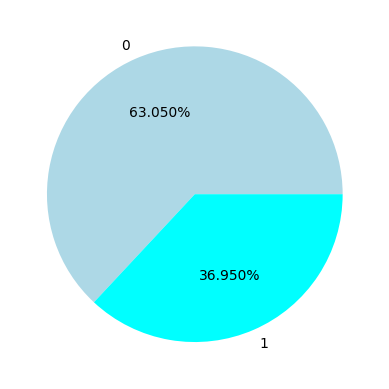

In [ ]:
plt.pie(dfg['total'],labels=dfg['is_canceled'], autopct='%.3f%%', colors=["lightblue" , "cyan"])
plt.show()

> Berdasarkan chart tersebut persentase canceled rate dari pelanggan= 36.9%. Pembuatan model machine learning bertujuan untuk mengantisipasi dan menurunkan pelanggan yang cancel.

# DATA COLLECTION

In [ ]:
# memisahkan feature numerical dengan categorical
nums = []
cats = []
for i in data.columns:
  if data[i].dtype == 'object':
    cats.append(i)
  else:
    nums.append(i)
print('jumlah = ',len(nums))
print('nums = ',nums)
print("============================================================================")
print('jumlah = ',len(cats))
print('cats = ',cats)

jumlah =  19
nums =  ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'bookingID']
jumlah =  12
cats =  ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date', 'country']


# Exploratory Data Analysis

## Categorical Features

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83293 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

In [ ]:
# mengganti reservation status date dari object menjadi date
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           83293 non-null  object        
 1   is_canceled                     83293 non-null  int64         
 2   lead_time                       83293 non-null  int64         
 3   arrival_date_year               83293 non-null  int64         
 4   arrival_date_month              83293 non-null  object        
 5   arrival_date_week_number        83293 non-null  int64         
 6   arrival_date_day_of_month       83293 non-null  int64         
 7   stays_in_weekend_nights         83293 non-null  int64         
 8   stays_in_week_nights            83293 non-null  int64         
 9   adults                          83293 non-null  int64         
 10  children                        83293 non-null  float64       
 11  ba

In [ ]:
data[cats].describe().transpose()

<ipython-input-51-030b54afc381>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data[cats].describe().transpose()


,count,unique,top,freq,first,last
hotel,83293,64,Renaissance New York Times Square Hotel New Yo...,1373,NaT,NaT
arrival_date_month,83293,12,August,9643,NaT,NaT
meal,83293,5,BB,64424,NaT,NaT
market_segment,83293,8,Online TA,39445,NaT,NaT
distribution_channel,83293,5,TA/TO,68368,NaT,NaT
reserved_room_type,83293,10,A,60062,NaT,NaT
assigned_room_type,83293,11,A,51702,NaT,NaT
deposit_type,83293,3,No Deposit,72979,NaT,NaT
customer_type,83293,4,Transient,62535,NaT,NaT
reservation_status,83293,3,Check-Out,52516,NaT,NaT


In [ ]:
#memperlihatkan unique cats value masing-masing
for i in cats:
  print('-----'*10)
  print(i)
  print(data[i].value_counts())

--------------------------------------------------
hotel
Renaissance New York Times Square Hotel New York, NY                           1373
Sacramento Airport Natomas Courtyard Sacramento, CA                            1372
Las Vegas Marriott Las Vegas, NV                                               1371
Crystal Cove, Barbados Barbados                                                1360
Protea Hotel by Marriott Midrand Midrand, South Africa                         1352
                                                                               ... 
W New York – Union Square New York, NY                                         1250
The House, Barbados Barbados                                                   1249
Sheraton Grand Rio Hotel & Resort Rio de Janeiro, Brazil                       1249
African Pride Melrose Arch, Autograph Collection Johannesburg, South Africa    1246
Residence Inn Rio de Janeiro Barra da Tijuca Barra da Tijuca, Brazil           1246
Name: hotel, Length

## Numerical Feature

In [ ]:
data[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,83293.0,0.369503,0.482673,0.0,0.00,0.0,1.0,1.0
lead_time,83293.0,103.914230,106.874124,0.0,18.00,69.0,160.0,737.0
arrival_date_year,83293.0,2018.156808,0.706656,2017.0,2018.00,2018.0,2019.0,2019.0
arrival_date_week_number,83293.0,27.164023,13.623752,1.0,16.00,27.0,38.0,53.0
arrival_date_day_of_month,83293.0,15.786116,8.775931,1.0,8.00,16.0,23.0,31.0
stays_in_weekend_nights,83293.0,0.930390,1.004196,0.0,0.00,1.0,2.0,19.0
stays_in_week_nights,83293.0,2.503812,1.924511,0.0,1.00,2.0,3.0,50.0
adults,83293.0,1.854466,0.606139,0.0,2.00,2.0,2.0,55.0
children,83293.0,0.103610,0.398815,0.0,0.00,0.0,0.0,10.0
babies,83293.0,0.008032,0.100641,0.0,0.00,0.0,0.0,10.0


## Analysis Categorical

> categorical analysis untuk data hotel

In [ ]:
hotel = data.groupby('hotel').agg({'bookingID':'count'}).reset_index()
hotel.columns=['hotel','total']
hotel['%'] = round(hotel.total*100/sum(hotel.total),3)
hotel

,hotel,total,%
0,"African Pride Melrose Arch, Autograph Collecti...",1246,1.496
1,"Albuquerque Airport Courtyard Albuquerque, NM",1325,1.591
2,"Anaheim Marriott Anaheim, CA",1308,1.570
3,"Baltimore BWI Airport Courtyard Linthicum, MD",1327,1.593
4,Baton Rouge Acadian Centre/LSU Area Courtyard ...,1336,1.604
...,...,...,...
59,"W Barcelona Barcelona, Spain",1327,1.593
60,"W London – Leicester Square London, United Kin...",1331,1.598
61,"W New York – Times Square New York, NY",1255,1.507
62,"W New York – Union Square New York, NY",1250,1.501


from matplotlib import pyplot as plt
hotel['total'].plot(kind='hist', bins=20, title='total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
hotel['%'].plot(kind='hist', bins=20, title='%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
hotel.plot(kind='scatter', x='total', y='%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
hotel['total'].plot(kind='line', figsize=(8, 4), title='total')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
hotel['%'].plot(kind='line', figsize=(8, 4), title='%')
plt.gca().spines[['top', 'right']].set_visible(False)

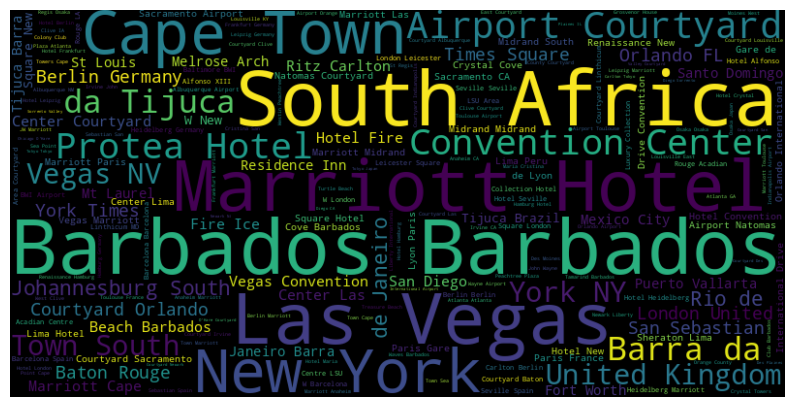

In [ ]:
from wordcloud import WordCloud

# Assuming 'data' is your dataset and 'your_column' is the column with text data
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(' '.join(data['hotel']))

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


arrival_date_month

In [ ]:
arrival = data.groupby('arrival_date_month').agg({'bookingID':'count'}).reset_index()
arrival.columns=['arrival_date_month','total']
arrival['%'] = round(arrival.total*100/sum(arrival.total),3)
arrival

,arrival_date_month,total,%
0,April,7787,9.349
1,August,9643,11.577
2,December,4742,5.693
3,February,5560,6.675
4,January,4214,5.059
5,July,8731,10.482
6,June,7666,9.204
7,March,6810,8.176
8,May,8222,9.871
9,November,4779,5.738


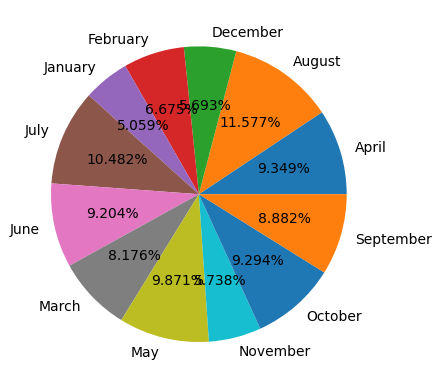

In [ ]:
plt.pie(arrival['total'],labels=arrival['arrival_date_month'], autopct='%.3f%%')
plt.show()

menunjukkan bahwa bulan kunjungan terbanyak adalah bulan Agustus, dengan persentase sebesar 11.5%

In [ ]:
meal = data.groupby('meal').agg({'bookingID':'count'}).reset_index()
meal.columns=['meal','total']
meal['%'] = round(meal.total*100/sum(meal.total),3)
meal

,meal,total,%
0,BB,64424,77.346
1,FB,542,0.651
2,HB,10098,12.123
3,SC,7401,8.886
4,Undefined,828,0.994


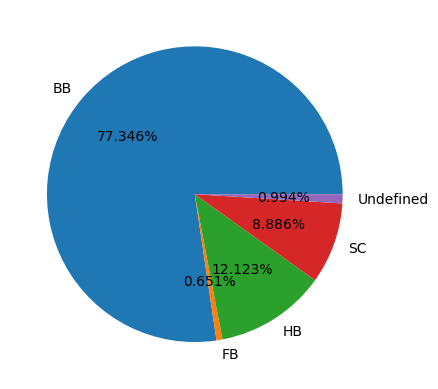

In [ ]:
plt.pie(meal['total'],labels=meal['meal'], autopct='%.3f%%')
plt.show()

* SC memiliki arti self-catering (tidak termasuk makanan).
* BB yaitu bed and breakfast(pelanggan memesan paket sarapan).
* HB means half board, breakfast and dinner are included (pelanggan memesan paket untuk sarapan dan makan malam).
* FB means full board, yang berarti pelanggan memesan paket komplit yaitu sarapan, makan siang dan makan malam.

sebanyak **77.3% pelanggan** tidak memesan makanan

In [ ]:
market_segment = data.groupby('market_segment').agg({'bookingID':'count'}).reset_index()
market_segment.columns=['market_segment','total']
market_segment['%'] = round(market_segment.total*100/sum(market_segment.total),3)
market_segment

,market_segment,total,%
0,Aviation,162,0.194
1,Complementary,524,0.629
2,Corporate,3706,4.449
3,Direct,8742,10.495
4,Groups,13791,16.557
5,Offline TA/TO,16922,20.316
6,Online TA,39445,47.357
7,Undefined,1,0.001


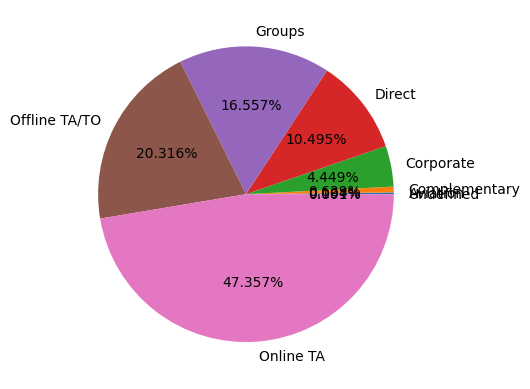

In [ ]:
plt.pie(market_segment['total'],labels=market_segment['market_segment'], autopct='%.3f%%')
plt.show()

Pemesanan terbanyak adalah melalui **agen travel online** sebesar 47.3%

* **Online TA** memiliki arti online travel agent, berarti pelanggan memesan hotel melalui agen travel daring
* **Offline TA** memiliki arti offline travel agent, berarti pelanggan memesan hotel melalui agen travel secara langsung (luring)
* **Groups** memiliki arti pelanggan memesan secara berkelompok
* **Direct** memiliki arti pelanggan memesan secara langsung via telepon atau email
* **Corporate** memiliki arti pelanggan yang memesan merupakan sebuah perusahaan
* **Complementary** merupakan pemesanan hotel yang umumnya gratis dan merupakan bonus dari keadaan tertentu
* **Aviation** merupakan pemesanan hotel yang berkaitan dengan layanan penerbangan

In [ ]:
distribution_channel = data.groupby('distribution_channel').agg({'bookingID':'count'}).reset_index()
distribution_channel.columns=['distribution_channel','total']
distribution_channel['%'] = round(distribution_channel.total*100/sum(distribution_channel.total),3)
distribution_channel

,distribution_channel,total,%
0,Corporate,4632,5.561
1,Direct,10156,12.193
2,GDS,133,0.160
3,TA/TO,68368,82.081
4,Undefined,4,0.005


Serupa dengan data pada market segment, distribution channel menunjukkan bahwa pemesanan terbanyak dilakukan melalui **Travel Agent**

In [ ]:

reserved_room_type = data.groupby('reserved_room_type').agg({'bookingID':'count'}).reset_index()
reserved_room_type.columns=['reserved_room_type','total']
reserved_room_type['%'] = round(reserved_room_type.total*100/sum(reserved_room_type.total),3)
reserved_room_type

,reserved_room_type,total,%
0,A,60062,72.109
1,B,777,0.933
2,C,658,0.790
3,D,13323,15.995
4,E,4566,5.482
5,F,2048,2.459
6,G,1438,1.726
7,H,408,0.490
8,L,3,0.004
9,P,10,0.012


Berdasarkan analisa yang dilakukan, tipe kamar yang paling banyak dipesan adalah **tipe A** sejumlah 72%

In [ ]:
assigned_room_type = data.groupby('assigned_room_type').agg({'bookingID':'count'}).reset_index()
assigned_room_type.columns=['assigned_room_type','total']
assigned_room_type['%'] = round(assigned_room_type.total*100/sum(assigned_room_type.total),3)
assigned_room_type

,assigned_room_type,total,%
0,A,51702,62.072
1,B,1530,1.837
2,C,1679,2.016
3,D,17591,21.119
4,E,5419,6.506
5,F,2641,3.171
6,G,1770,2.125
7,H,482,0.579
8,I,262,0.315
9,K,207,0.249


Pada bagian tipe kamar yang paling banyak didapatkan. Serupa dengan tipe kamar yang dipesan, menunjukkan bahwa adalah **tipe A** merupakan tipe kamar paling banyak didapatkan, namun dengan persentase lebih rendah yaitu 62%. kemungkinan banyak yang tidak mendapatkan kamar A diganti dengan kamar lain seperti B,C,D,E dan seterusnya dilihat dari jumlah yang bertambah

In [ ]:
deposit_type = data.groupby('deposit_type').agg({'bookingID':'count'}).reset_index()
deposit_type.columns=['deposit_type','total']
deposit_type['%'] = round(deposit_type.total*100/sum(deposit_type.total),3)
deposit_type

,deposit_type,total,%
0,No Deposit,72979,87.617
1,Non Refund,10204,12.251
2,Refundable,110,0.132


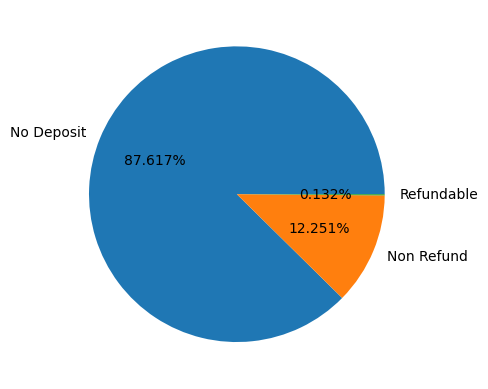

In [ ]:
plt.pie(deposit_type['total'],labels=deposit_type['deposit_type'], autopct='%.3f%%')
plt.show()

sebagian besar pelanggan lebih memilih pembayaran dengan No Deposit dengan persentase sebesar 87%

In [ ]:
customer_type = data.groupby('customer_type').agg({'bookingID':'count'}).reset_index()
customer_type.columns=['customer_type','total']
customer_type['%'] = round(customer_type.total*100/sum(customer_type.total),3)
customer_type

,customer_type,total,%
0,Contract,2793,3.353
1,Group,410,0.492
2,Transient,62535,75.078
3,Transient-Party,17555,21.076


In [ ]:
reservation_status = data.groupby('reservation_status').agg({'bookingID':'count'}).reset_index()
reservation_status.columns=['reservation_status','total']
reservation_status['%'] = round(reservation_status.total*100/sum(reservation_status.total),3)
reservation_status

,reservation_status,total,%
0,Canceled,29923,35.925
1,Check-Out,52516,63.050
2,No-Show,854,1.025


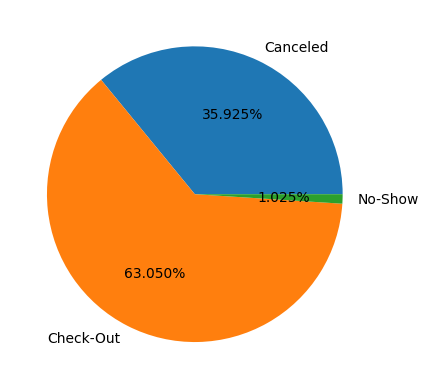

In [ ]:
plt.pie(reservation_status['total'],labels=reservation_status['reservation_status'], autopct='%.3f%%')
plt.show()

Serupa dengan kolom pembatalan pesanan, data status reservasi juga menunjukkan bahwa lebih banyak pelanggan yang berhasil melakukan Check Out sebesar 63%

Sedangkan, pelanggan yang batal dibagi menjadi 2 yaitu canceled (dibatalkan) dan no show (tidak muncul/konfirmasi pemesanan)

In [ ]:
country = data.groupby('country').agg({'bookingID':'count'}).reset_index()
country.columns=['country','total']
country['%'] = round(country.total*100/sum(country.total),3)
country

,country,total,%
0,ABW,2,0.002
1,AGO,267,0.321
2,AIA,1,0.001
3,ALB,7,0.008
4,AND,5,0.006
...,...,...,...
160,VEN,17,0.020
161,VNM,4,0.005
162,ZAF,56,0.067
163,ZMB,2,0.002


In [ ]:
#mengurutkan dari total terbanyak/Sort Dataframe rows by most frequent values in a column
reservation_status_date = data.groupby('reservation_status_date').agg({'bookingID':'count'}).reset_index()
reservation_status_date.columns=['reservation_status_date','total']
reservation_status_date.sort_values('total', ascending=False)

,reservation_status_date,total
224,2017-10-21,1024
624,2018-11-25,560
117,2017-07-06,558
0,2017-01-01,535
313,2018-01-18,437
...,...,...
12,2017-02-11,1
13,2017-02-12,1
34,2017-03-29,1
15,2017-02-19,1


> reservasi terbanyak terjadi di 2017-10-21, kemudian disusul dengan tanggal 2017-07-06, serta pada bulan Januari pada tahun 2017 dan 2018

Text(0.5, 1.0, 'Line Chart with Datetime Data')

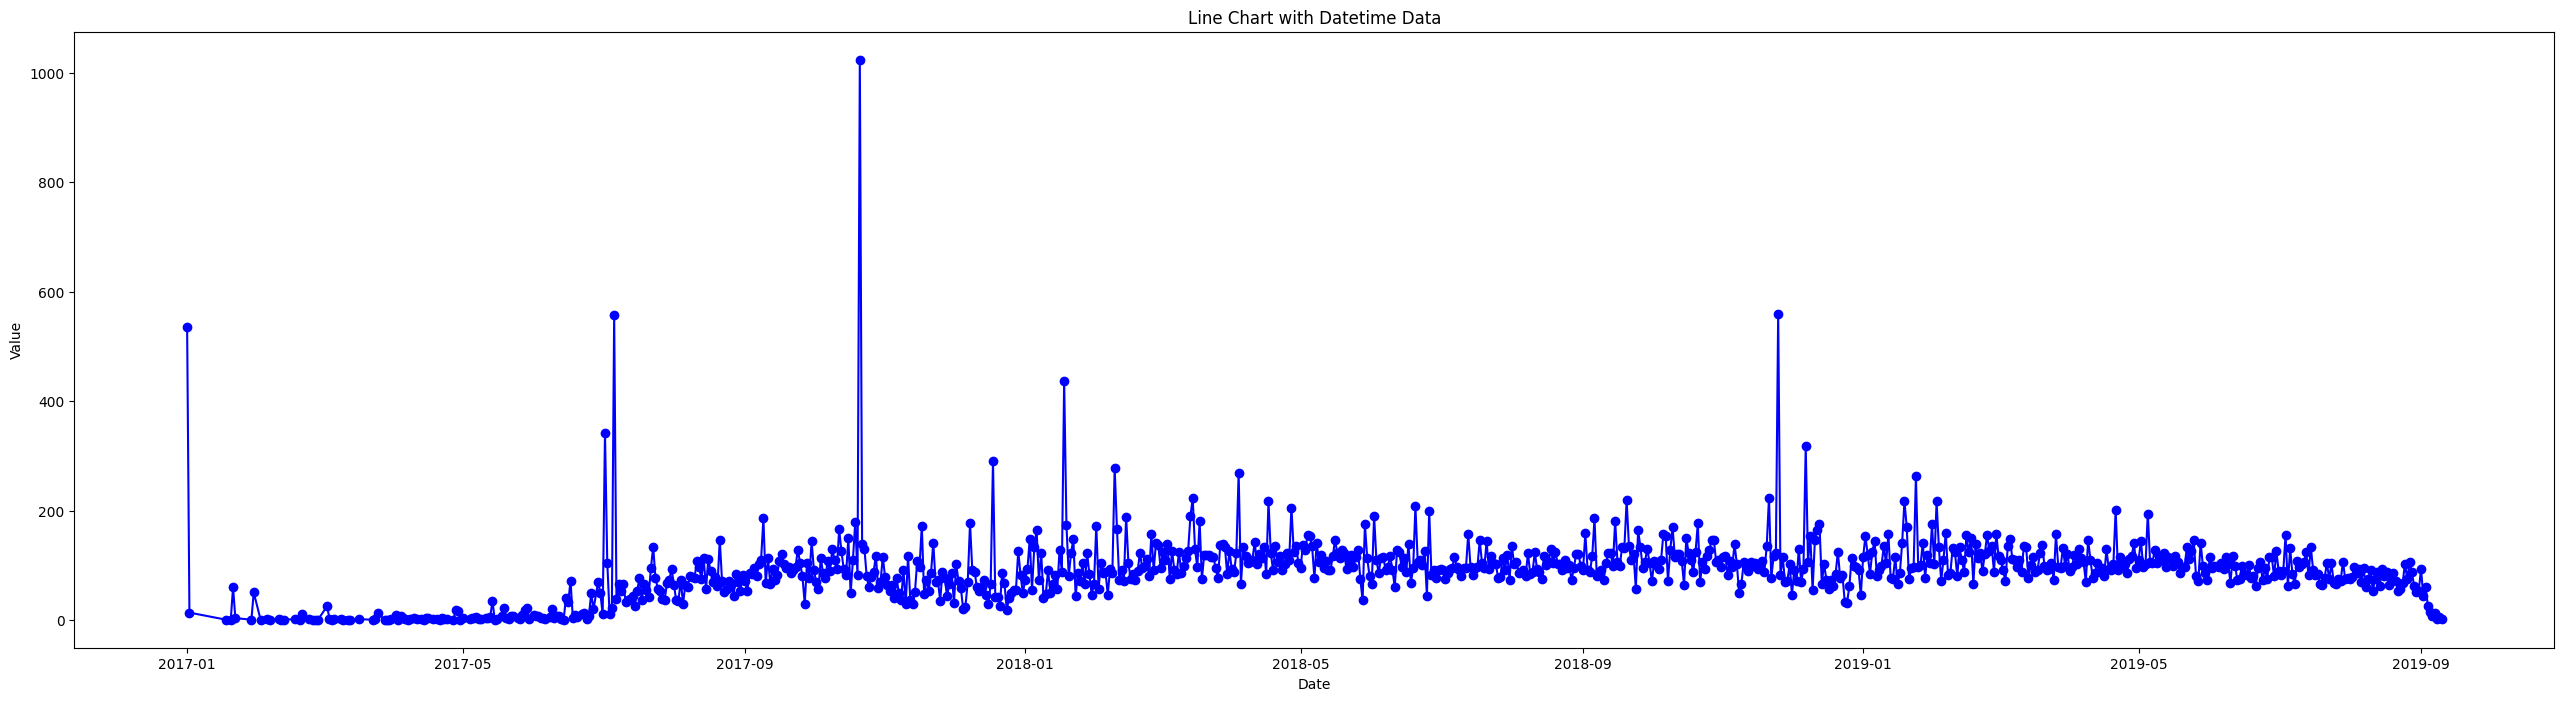

In [ ]:
reservation_status_date = data.groupby('reservation_status_date').agg({'bookingID':'count'}).reset_index()
reservation_status_date.columns=['reservation_status_date','total']

plt.figure(figsize=(32, 8))
plt.plot(reservation_status_date['reservation_status_date'], reservation_status_date['total'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Line Chart with Datetime Data')

# Feature Engineering

Melakukan feature engineering sebelum data diproses dengan model machine learning

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID,country
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,...,No Deposit,0,Transient,38.40,0,0,Check-Out,2019-01-14,1,ITA
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,...,Non Refund,0,Transient,62.80,0,0,Canceled,2017-10-21,2,PRT
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,...,Non Refund,0,Transient,110.00,0,0,Canceled,2018-11-25,3,PRT
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,...,No Deposit,0,Transient,45.00,0,0,Check-Out,2018-10-18,4,PRT
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,...,No Deposit,0,Transient,57.92,0,1,Canceled,2017-08-24,5,PRT


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83293 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

## Dropping feature that may not be related

Memilih data apa saja yang akan dibuang atau digunakan untuk proses training dan testing

> menghapus kolom dengan data yang memiliki terlalu banyak unique values

In [ ]:
data_final = data
data_final = data_final.drop('reservation_status_date', axis=1)

In [ ]:
data_final = data_final.drop('bookingID', axis=1)

In [ ]:
data_final = data_final.drop('adr', axis=1)

In [ ]:
data_final = data_final.drop('lead_time', axis=1)

> menghapus kolom dengan data yang terlalu berkaitan (hampir sama) dengan kolom target

In [ ]:
data_final = data_final.drop('reservation_status', axis=1)

## Feature Engineering for categories

mengecek unique value dari target

In [ ]:
data_final.is_canceled.value_counts()

0    52516
1    30777
Name: is_canceled, dtype: int64

In [ ]:
df_encode = data_final.copy()

In [ ]:
# memisahkan feature numerical dengan categorical
nums2 = []
cats2 = []
for i in data_final.columns:
  if data[i].dtype == 'object':
    cats2.append(i)
  else:
    nums2.append(i)
print('jumlah = ',len(nums2))
print('nums = ',nums2)
print("============================================================================")
print('jumlah = ',len(cats2))
print('cats = ',cats2)

jumlah =  16
nums =  ['is_canceled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']
jumlah =  10
cats =  ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'country']


melihat statistik data numerik

In [ ]:
df_encode[nums2].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,83293.0,0.369503,0.482673,0.0,0.0,0.0,1.0,1.0
arrival_date_year,83293.0,2018.156808,0.706656,2017.0,2018.0,2018.0,2019.0,2019.0
arrival_date_week_number,83293.0,27.164023,13.623752,1.0,16.0,27.0,38.0,53.0
arrival_date_day_of_month,83293.0,15.786116,8.775931,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,83293.0,0.930390,1.004196,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,83293.0,2.503812,1.924511,0.0,1.0,2.0,3.0,50.0
adults,83293.0,1.854466,0.606139,0.0,2.0,2.0,2.0,55.0
children,83293.0,0.103610,0.398815,0.0,0.0,0.0,0.0,10.0
babies,83293.0,0.008032,0.100641,0.0,0.0,0.0,0.0,10.0
is_repeated_guest,83293.0,0.030243,0.171255,0.0,0.0,0.0,0.0,1.0


melihat statistik data kategori

In [ ]:
df_encode[cats2].describe().transpose()

,count,unique,top,freq
hotel,83293,64,Renaissance New York Times Square Hotel New Yo...,1373
arrival_date_month,83293,12,August,9643
meal,83293,5,BB,64424
market_segment,83293,8,Online TA,39445
distribution_channel,83293,5,TA/TO,68368
reserved_room_type,83293,10,A,60062
assigned_room_type,83293,11,A,51702
deposit_type,83293,3,No Deposit,72979
customer_type,83293,4,Transient,62535
country,83293,165,PRT,34082


Selanjutnya, akan coba mengecek unique value dari masing-masing kategori

In [ ]:
data_final.meal.value_counts()

BB           64424
HB           10098
SC            7401
Undefined      828
FB             542
Name: meal, dtype: int64

In [ ]:
data_final.arrival_date_month.value_counts()

August       9643
July         8731
May          8222
April        7787
October      7741
June         7666
September    7398
March        6810
February     5560
November     4779
December     4742
January      4214
Name: arrival_date_month, dtype: int64

In [ ]:
data_final.reserved_room_type.value_counts()

A    60062
D    13323
E     4566
F     2048
G     1438
B      777
C      658
H      408
P       10
L        3
Name: reserved_room_type, dtype: int64

In [ ]:
data_final.assigned_room_type.value_counts()

A    51702
D    17591
E     5419
F     2641
G     1770
C     1679
B     1530
H      482
I      262
K      207
P       10
Name: assigned_room_type, dtype: int64

In [ ]:
data_final.market_segment.value_counts()

Online TA        39445
Offline TA/TO    16922
Groups           13791
Direct            8742
Corporate         3706
Complementary      524
Aviation           162
Undefined            1
Name: market_segment, dtype: int64

In [ ]:
data_final.distribution_channel.value_counts()

TA/TO        68368
Direct       10156
Corporate     4632
GDS            133
Undefined        4
Name: distribution_channel, dtype: int64

In [ ]:
data_final.deposit_type.value_counts()

No Deposit    72979
Non Refund    10204
Refundable      110
Name: deposit_type, dtype: int64

In [ ]:
data_final.customer_type.value_counts()

Transient          62535
Transient-Party    17555
Contract            2793
Group                410
Name: customer_type, dtype: int64

melakukan label encoding manual, agar penggunaan angka sesuai

In [ ]:
df_encode.meal.replace({'Undefined':0,'SC':1,'BB':2,'HB':3,'FB':4},inplace=True)
df_encode.arrival_date_month.replace({'January':0,'February':1,'March':2,'April':3,'May':4,'June':5,'July':6,
                                      'August':7,'September':8,'October':9,'November':10,'December':11},inplace=True)
df_encode.reserved_room_type.replace({'P':0,'L':1,'H':2,'G':3,'F':4,'E':5,'D':6,'C':7,'B':8,'A':9},inplace=True)
df_encode.assigned_room_type.replace({'P':0,'K':1,'I':2,'H':3,'G':4,'F':5,'E':6,'D':7,'C':8,'B':9,'A':10},inplace=True)
df_encode.market_segment.replace({'Undefined':0,'Aviation':1,'Complementary':2,'Corporate':3 ,'Direct':4,'Groups':5,'Offline TA/TO':6,'Online TA':7},inplace=True)
df_encode.distribution_channel.replace({'Undefined':0,'GDS':1,'Corporate':2,'Direct':3 ,'TA/TO':4},inplace=True)
df_encode.deposit_type.replace({'Refundable':0,'Non Refund':1,'No Deposit':2 },inplace=True)
df_encode.customer_type.replace({'Group':0,'Contract':1,'Transient-Party':2,'Transient':3 },inplace=True)

In [ ]:
label_encode = ['meal','arrival_date_month','reserved_room_type','assigned_room_type','market_segment','distribution_channel','deposit_type','customer_type']

In [ ]:
df_encode[label_encode].head()

,meal,arrival_date_month,reserved_room_type,assigned_room_type,market_segment,distribution_channel,deposit_type,customer_type
0,2,0,9,10,7,4,2,3
1,2,11,9,10,5,4,1,3
2,2,4,9,10,5,4,1,3
3,2,9,9,10,3,2,2,3
4,2,8,9,10,6,4,2,3


In [ ]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   arrival_date_year               83293 non-null  int64  
 3   arrival_date_month              83293 non-null  int64  
 4   arrival_date_week_number        83293 non-null  int64  
 5   arrival_date_day_of_month       83293 non-null  int64  
 6   stays_in_weekend_nights         83293 non-null  int64  
 7   stays_in_week_nights            83293 non-null  int64  
 8   adults                          83293 non-null  int64  
 9   children                        83293 non-null  float64
 10  babies                          83293 non-null  int64  
 11  meal                            83293 non-null  int64  
 12  market_segment                  

### Label Encoder for Hotels and country

menggunakan library, karena unique value yang terlalu banyak

In [ ]:
from sklearn.preprocessing import LabelEncoder

#create instance of label encoder
lab = LabelEncoder()

df_encode['hotel'] = lab.fit_transform(df_encode['hotel'])

In [ ]:
df_encode['country'] = lab.fit_transform(df_encode['country'])

In [ ]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  int64  
 1   is_canceled                     83293 non-null  int64  
 2   arrival_date_year               83293 non-null  int64  
 3   arrival_date_month              83293 non-null  int64  
 4   arrival_date_week_number        83293 non-null  int64  
 5   arrival_date_day_of_month       83293 non-null  int64  
 6   stays_in_weekend_nights         83293 non-null  int64  
 7   stays_in_week_nights            83293 non-null  int64  
 8   adults                          83293 non-null  int64  
 9   children                        83293 non-null  float64
 10  babies                          83293 non-null  int64  
 11  meal                            83293 non-null  int64  
 12  market_segment                  

## Feature Correlation with correlation matrix

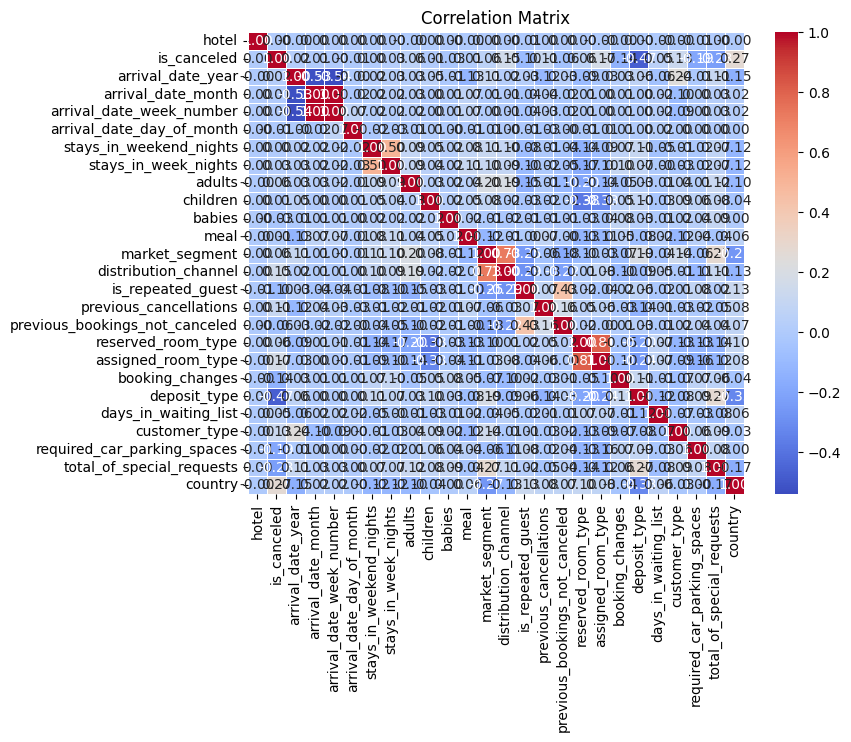

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = df_encode

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Split Train Test

Data akan dibagi menjadi data training (latih) sebesar 80% dan data testing (uji) sebesar 20%

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
print(df_encode.isnull().sum().sort_values(ascending=False))

hotel                             0
is_canceled                       0
total_of_special_requests         0
required_car_parking_spaces       0
customer_type                     0
days_in_waiting_list              0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number          0
arrival_date_month                0
arrival_date_year                 0
country                           0
dtype: int64


In [ ]:
# Membagi antara features vs target
X = df_encode.drop('is_canceled', axis=1)
y = df_encode['is_canceled'].values
print(X.shape)
print(y.shape)

(83293, 25)
(83293,)


In [ ]:
# Membagi data menjadi 80% train dan 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66634 entries, 63240 to 15795
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           66634 non-null  int64  
 1   arrival_date_year               66634 non-null  int64  
 2   arrival_date_month              66634 non-null  int64  
 3   arrival_date_week_number        66634 non-null  int64  
 4   arrival_date_day_of_month       66634 non-null  int64  
 5   stays_in_weekend_nights         66634 non-null  int64  
 6   stays_in_week_nights            66634 non-null  int64  
 7   adults                          66634 non-null  int64  
 8   children                        66634 non-null  float64
 9   babies                          66634 non-null  int64  
 10  meal                            66634 non-null  int64  
 11  market_segment                  66634 non-null  int64  
 12  distribution_channel        

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24988 entries, 3117 to 33574
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           24988 non-null  int64  
 1   arrival_date_year               24988 non-null  int64  
 2   arrival_date_month              24988 non-null  int64  
 3   arrival_date_week_number        24988 non-null  int64  
 4   arrival_date_day_of_month       24988 non-null  int64  
 5   stays_in_weekend_nights         24988 non-null  int64  
 6   stays_in_week_nights            24988 non-null  int64  
 7   adults                          24988 non-null  int64  
 8   children                        24988 non-null  float64
 9   babies                          24988 non-null  int64  
 10  meal                            24988 non-null  int64  
 11  market_segment                  24988 non-null  int64  
 12  distribution_channel         

In [ ]:
print('Split into 80:20')
print('Total rows & column of train set:',X_train.shape)
print('Total rows & column of train set:',y_train.shape)
print('Total rows & column of test set:',X_test.shape)
print('Total rows & column of test set:',y_test.shape)


Split into 80:20
Total rows & column of train set: (66634, 25)
Total rows & column of train set: (66634,)
Total rows & column of test set: (16659, 25)
Total rows & column of test set: (16659,)


# Model

Model yang digunakan adalah **random forest classifier**, yang merupakan salah satu model terbaik yang dapat digunakan untuk klasifikasi

Model yang digunakan menerapkan estimator sebesar 200, max_depth 4 dan random state 18

In [ ]:
clf = RandomForestClassifier(n_estimators = 200, max_depth = 4,
                             random_state = 18).fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
predictions = clf.predict(X_test)


In [ ]:
print("confusion matrix:")
cm =confusion_matrix(y_test,predictions, labels=clf.classes_)
print(cm)

confusion matrix:
[[10465     7]
 [ 3863  2324]]


Hasil confusion matrix yang dilakukan, mendapatkan hasil sebagai berikut
* **True positive** atau prediksi canceled(1) dan data asli menunjukkan canceled(1) sebesar 2324 data
* **True Negative** atau prediksi tidak canceled(0) dan data asli menunjukkan tidak canceled(0) sebesar 10465 data
* **False Negative** atau prediksi canceled(1) dan data asli menunjukkan tidak canceled(0) sebesar 7 data
* **False Positive** atau prediksi tidak canceled(0) dan data asli menunjukkan canceled(1) sebesar 3863 data

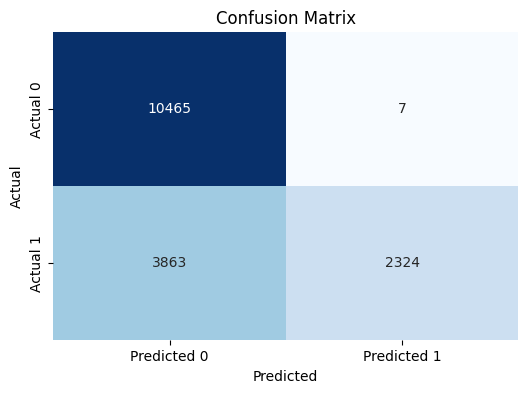

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("classification report:")
print(classification_report(y_test,predictions))

classification report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84     10472
           1       1.00      0.38      0.55      6187

    accuracy                           0.77     16659
   macro avg       0.86      0.69      0.69     16659
weighted avg       0.83      0.77      0.73     16659



Hasil akurasi cukup baik yaitu 77%. namun untuk data reservasi gagal (1) , recall yang didapatkan cenderung rendah yaitu 38%, serta f1 score yang juga rendah yaitu 55%

F1 score perlu diperhatikan dalam kasus ini, dikarenakan adanya imbalanced dataset, serta yang perlu diperhatikan adalah "positive value" atau canceled (1). Karena kita ingin mengetahui kemungkinan pelanggan untuk membatalkan reservasi

# Applying SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Class distribution before SMOTE:")
print(pd.Series(y_train2).value_counts())

Class distribution before SMOTE:
0    42044
1    24590
dtype: int64


In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train2, y_train2)

In [ ]:
print("\nClass distribution after applying SMOTE:")
print(pd.Series(y_resampled).value_counts())


Class distribution after applying SMOTE:
1    42044
0    42044
dtype: int64


In [ ]:
rfc = RandomForestClassifier(n_estimators = 200, max_depth = 4,
                             random_state = 18).fit(X_resampled, y_resampled)

y_test_predictions2 = rfc.predict(X_test2)


In [ ]:
print("classification report:")
print(classification_report(y_test2,y_test_predictions2))

classification report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85     10472
           1       0.77      0.67      0.72      6187

    accuracy                           0.80     16659
   macro avg       0.79      0.78      0.78     16659
weighted avg       0.80      0.80      0.80     16659



Dengan menerapkan SMOTE untuk menyeimbangkan data target yaitu pada kolom is_canceled dengan value canceled (1), terdapat peningkatan terutama pada bagian f1 score dari 55% menjadi 72%, dan recall dari 38% menjadi 67%

# Applying GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_resampled, y_resampled)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Predict on the test set
y_predict = best_model.predict(X_test2)


In [ ]:
cm2 =confusion_matrix(y_test2,y_predict, labels=clf.classes_)
print(cm2)

[[9341 1131]
 [1280 4907]]


In [ ]:
print("classification report:")
print(classification_report(y_test2,y_predict))

classification report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89     10472
           1       0.81      0.79      0.80      6187

    accuracy                           0.86     16659
   macro avg       0.85      0.84      0.84     16659
weighted avg       0.85      0.86      0.85     16659



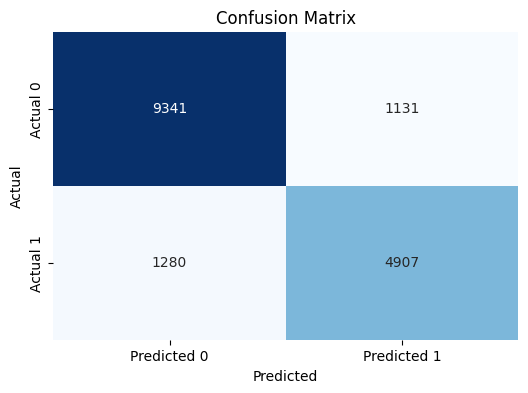

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Terdapat peningkatan terhadap Akurasi menjadi 86%. Selain itu, nilai F1 score juga mengalami peningkatan menjadi 80%.

Dapat dilihat pada confusion matrix bahwa hasil model dalam prediksi false negative (prediksi tidak canceled, namun data real menunjukkan canceled) sudah berkurang.

